In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('src/winequality-red.csv')
df.columns = df.columns.str.replace(' ','_')
df.head() # The last column, quality, is a metric of how good a specific wine was rated to be, between 1 to 10.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.isnull().any() # Check if there are any columns with missing information.

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [4]:
df.info() # Additional Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Some queries
n_wines = df.shape[0]

# How many 8-ranked wine are here?
max_quality = df.loc[(df['quality'] == 5)]
max_quality

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


In [6]:
# correlation of features with quality: ranked by strength
df.corr()['quality'].sort_values()

volatile_acidity       -0.390558
total_sulfur_dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free_sulfur_dioxide    -0.050656
residual_sugar          0.013732
fixed_acidity           0.124052
citric_acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

## Data Visualization


### Distribution Plots

The distribution plots provide a visual summary of the data's distribution by showing how values are spread across each column. The histogram displays the frequency of values in intervals, while the KDE curve (if present) smooths this into a continuous probability density function, highlighting the data's overall shape, skewness, and spread. These plots help identify patterns, outliers, and the general behavior of the data.

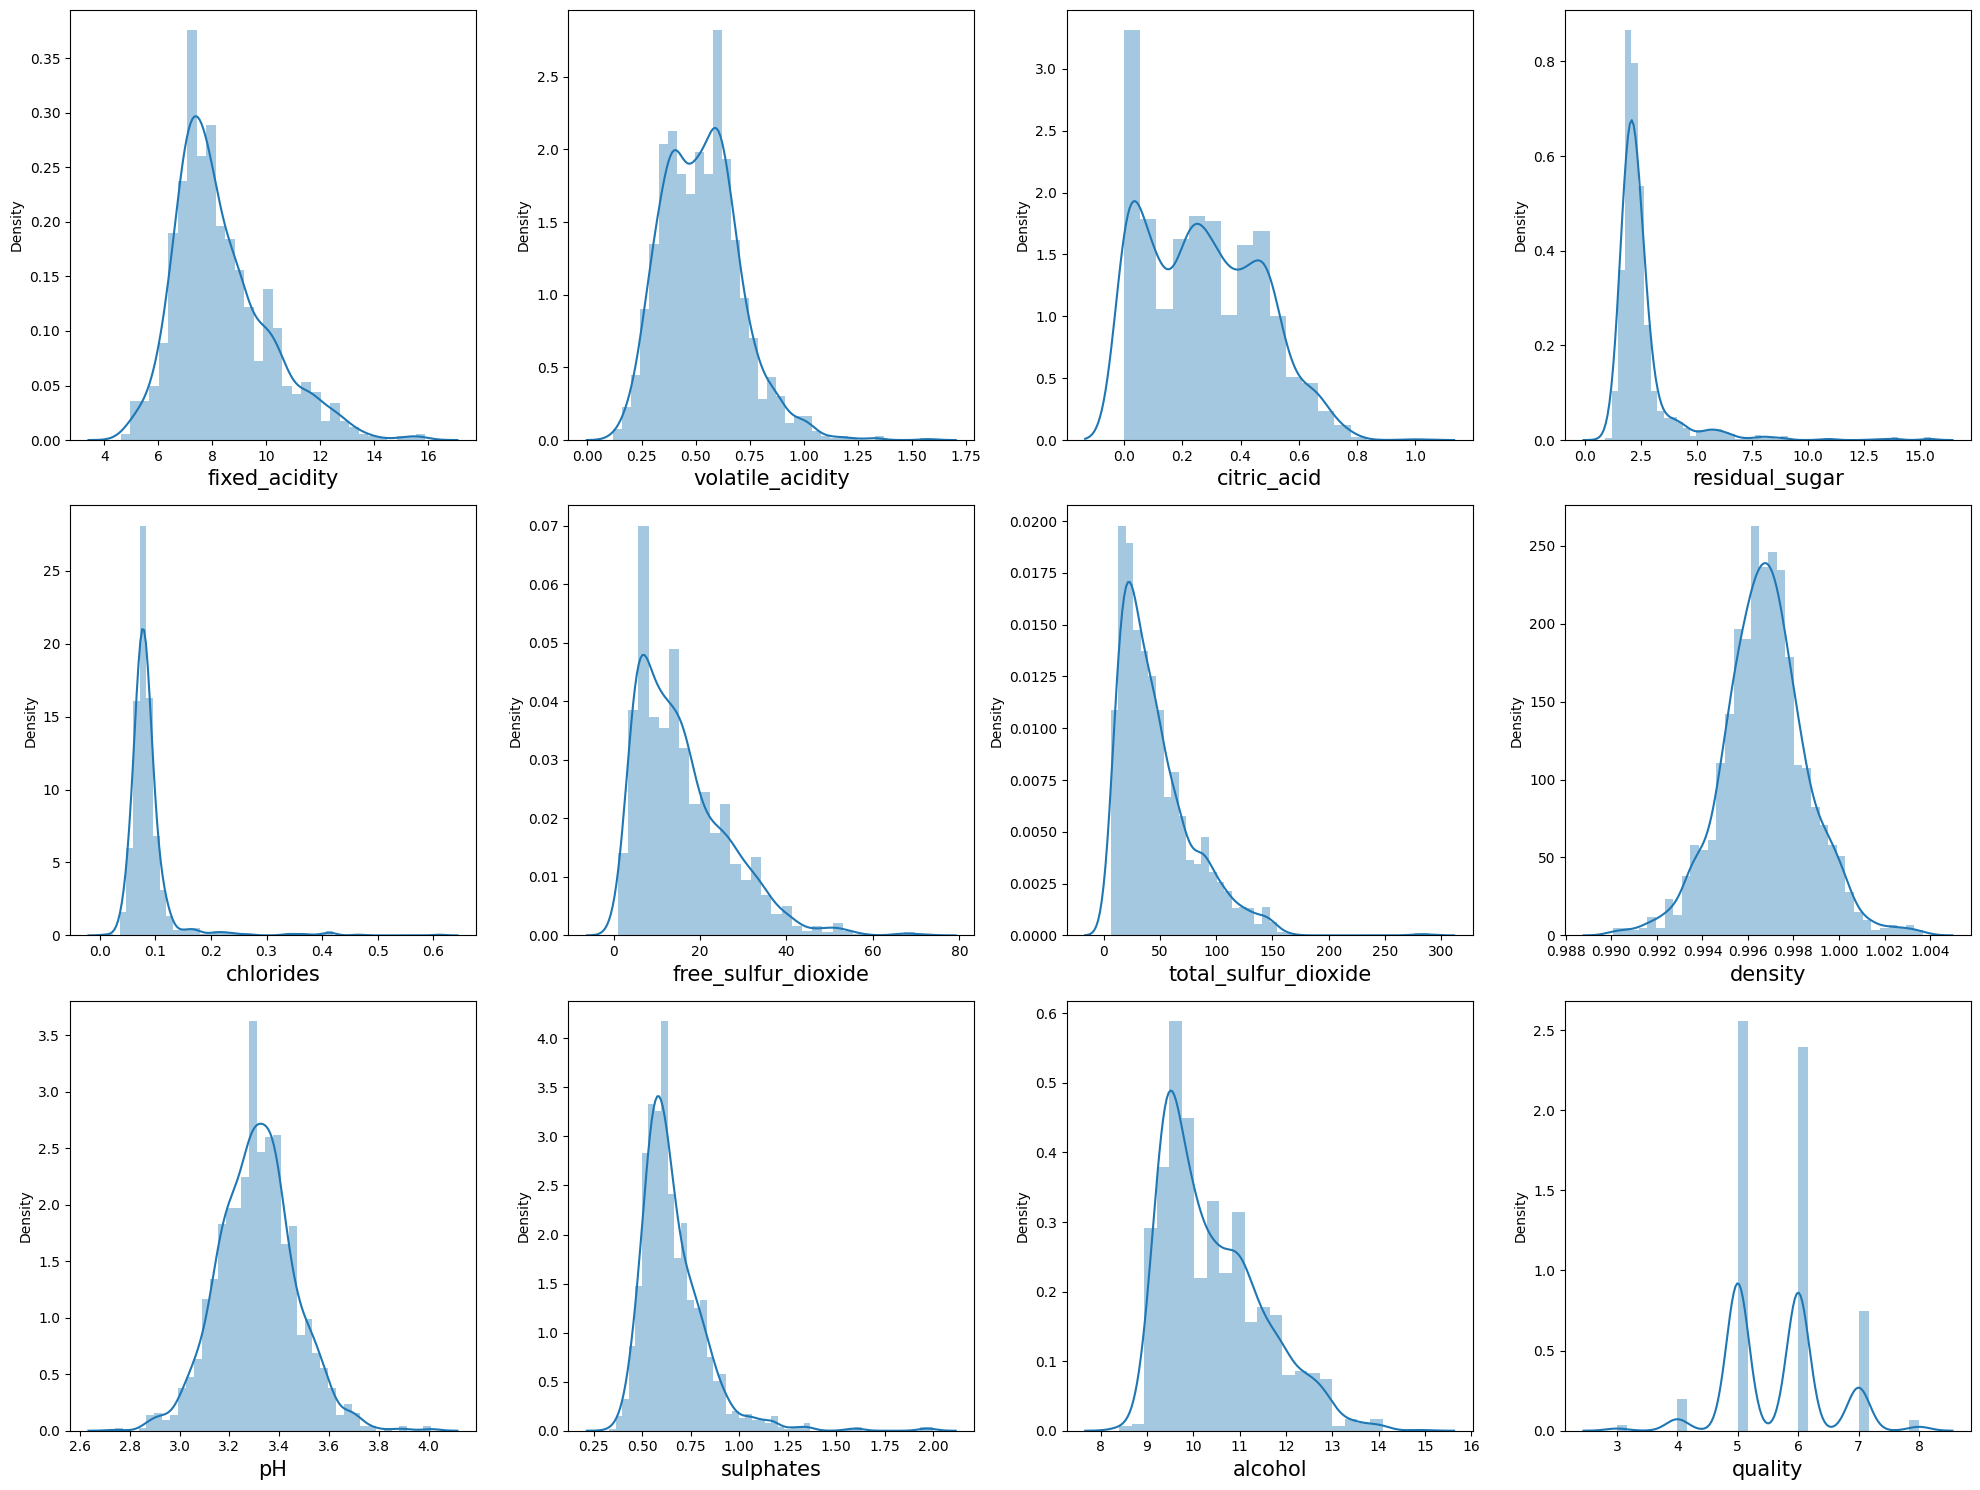

In [7]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize =(20,15))
plotnumber = 1

for column in df:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 15)
        
    plotnumber +=1
plt.tight_layout()

### Exploring the Relationship Between Quality and Key Features

The generated graphs are line plots, showing the relationship between the quality column and each of the other columns in the DataFrame. A line plot connects data points with a continuous line, providing a clear visual of trends, patterns, or relationships between two variables. By plotting each column against quality, these graphs highlight how changes in each variable correspond to changes in quality. This is useful for identifying linear or nonlinear relationships, correlations, and potential outliers between the features and the target variable quality.

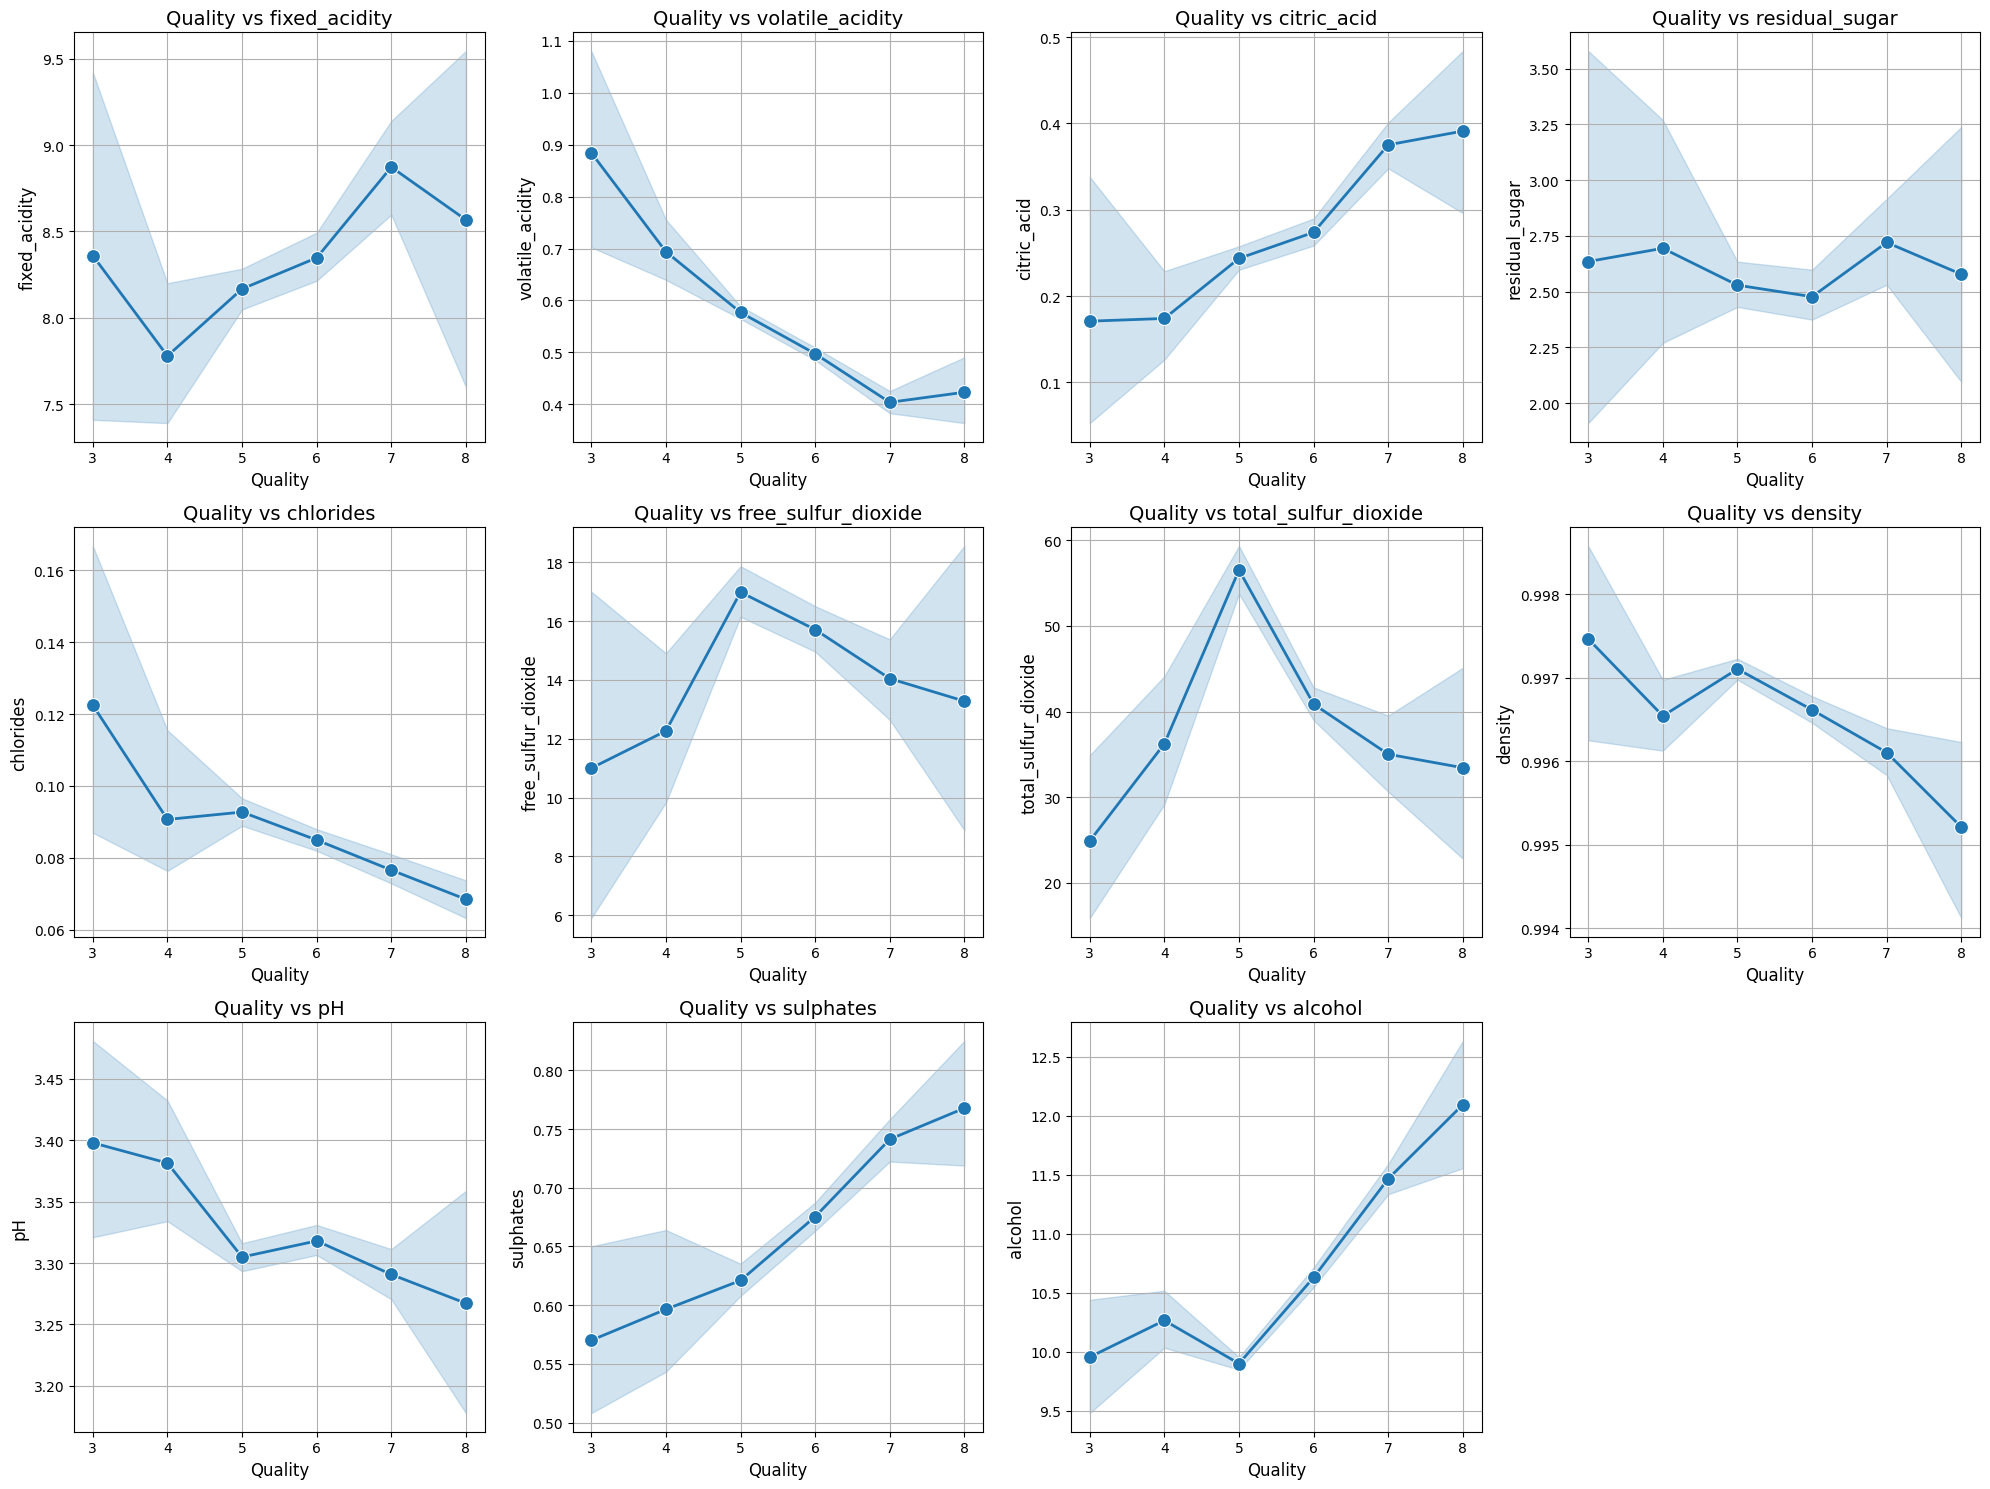

In [8]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in df.columns:
    if column != 'quality':
        plt.subplot(3, 4, plotnumber)  # Define subplot in a grid
        sns.lineplot(x='quality', y=column, data=df, marker='o', markersize=10, linewidth=2)
        plt.title(f'Quality vs {column}', fontsize=14)
        plt.xlabel('Quality', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True)
        plotnumber += 1

plt.tight_layout()
plt.show()


### BoxPlots

The generated graphs are box plots, which display the distribution of each column in the DataFrame, visualizing key summary statistics such as the median, quartiles, and potential outliers. Box plots help identify the spread of the data, its symmetry (or skewness), and the presence of extreme values (outliers). They also provide a clear understanding of how data is concentrated within the interquartile range (IQR) and how it might deviate beyond that. These plots are useful for comparing distributions across multiple variables and detecting unusual data points.

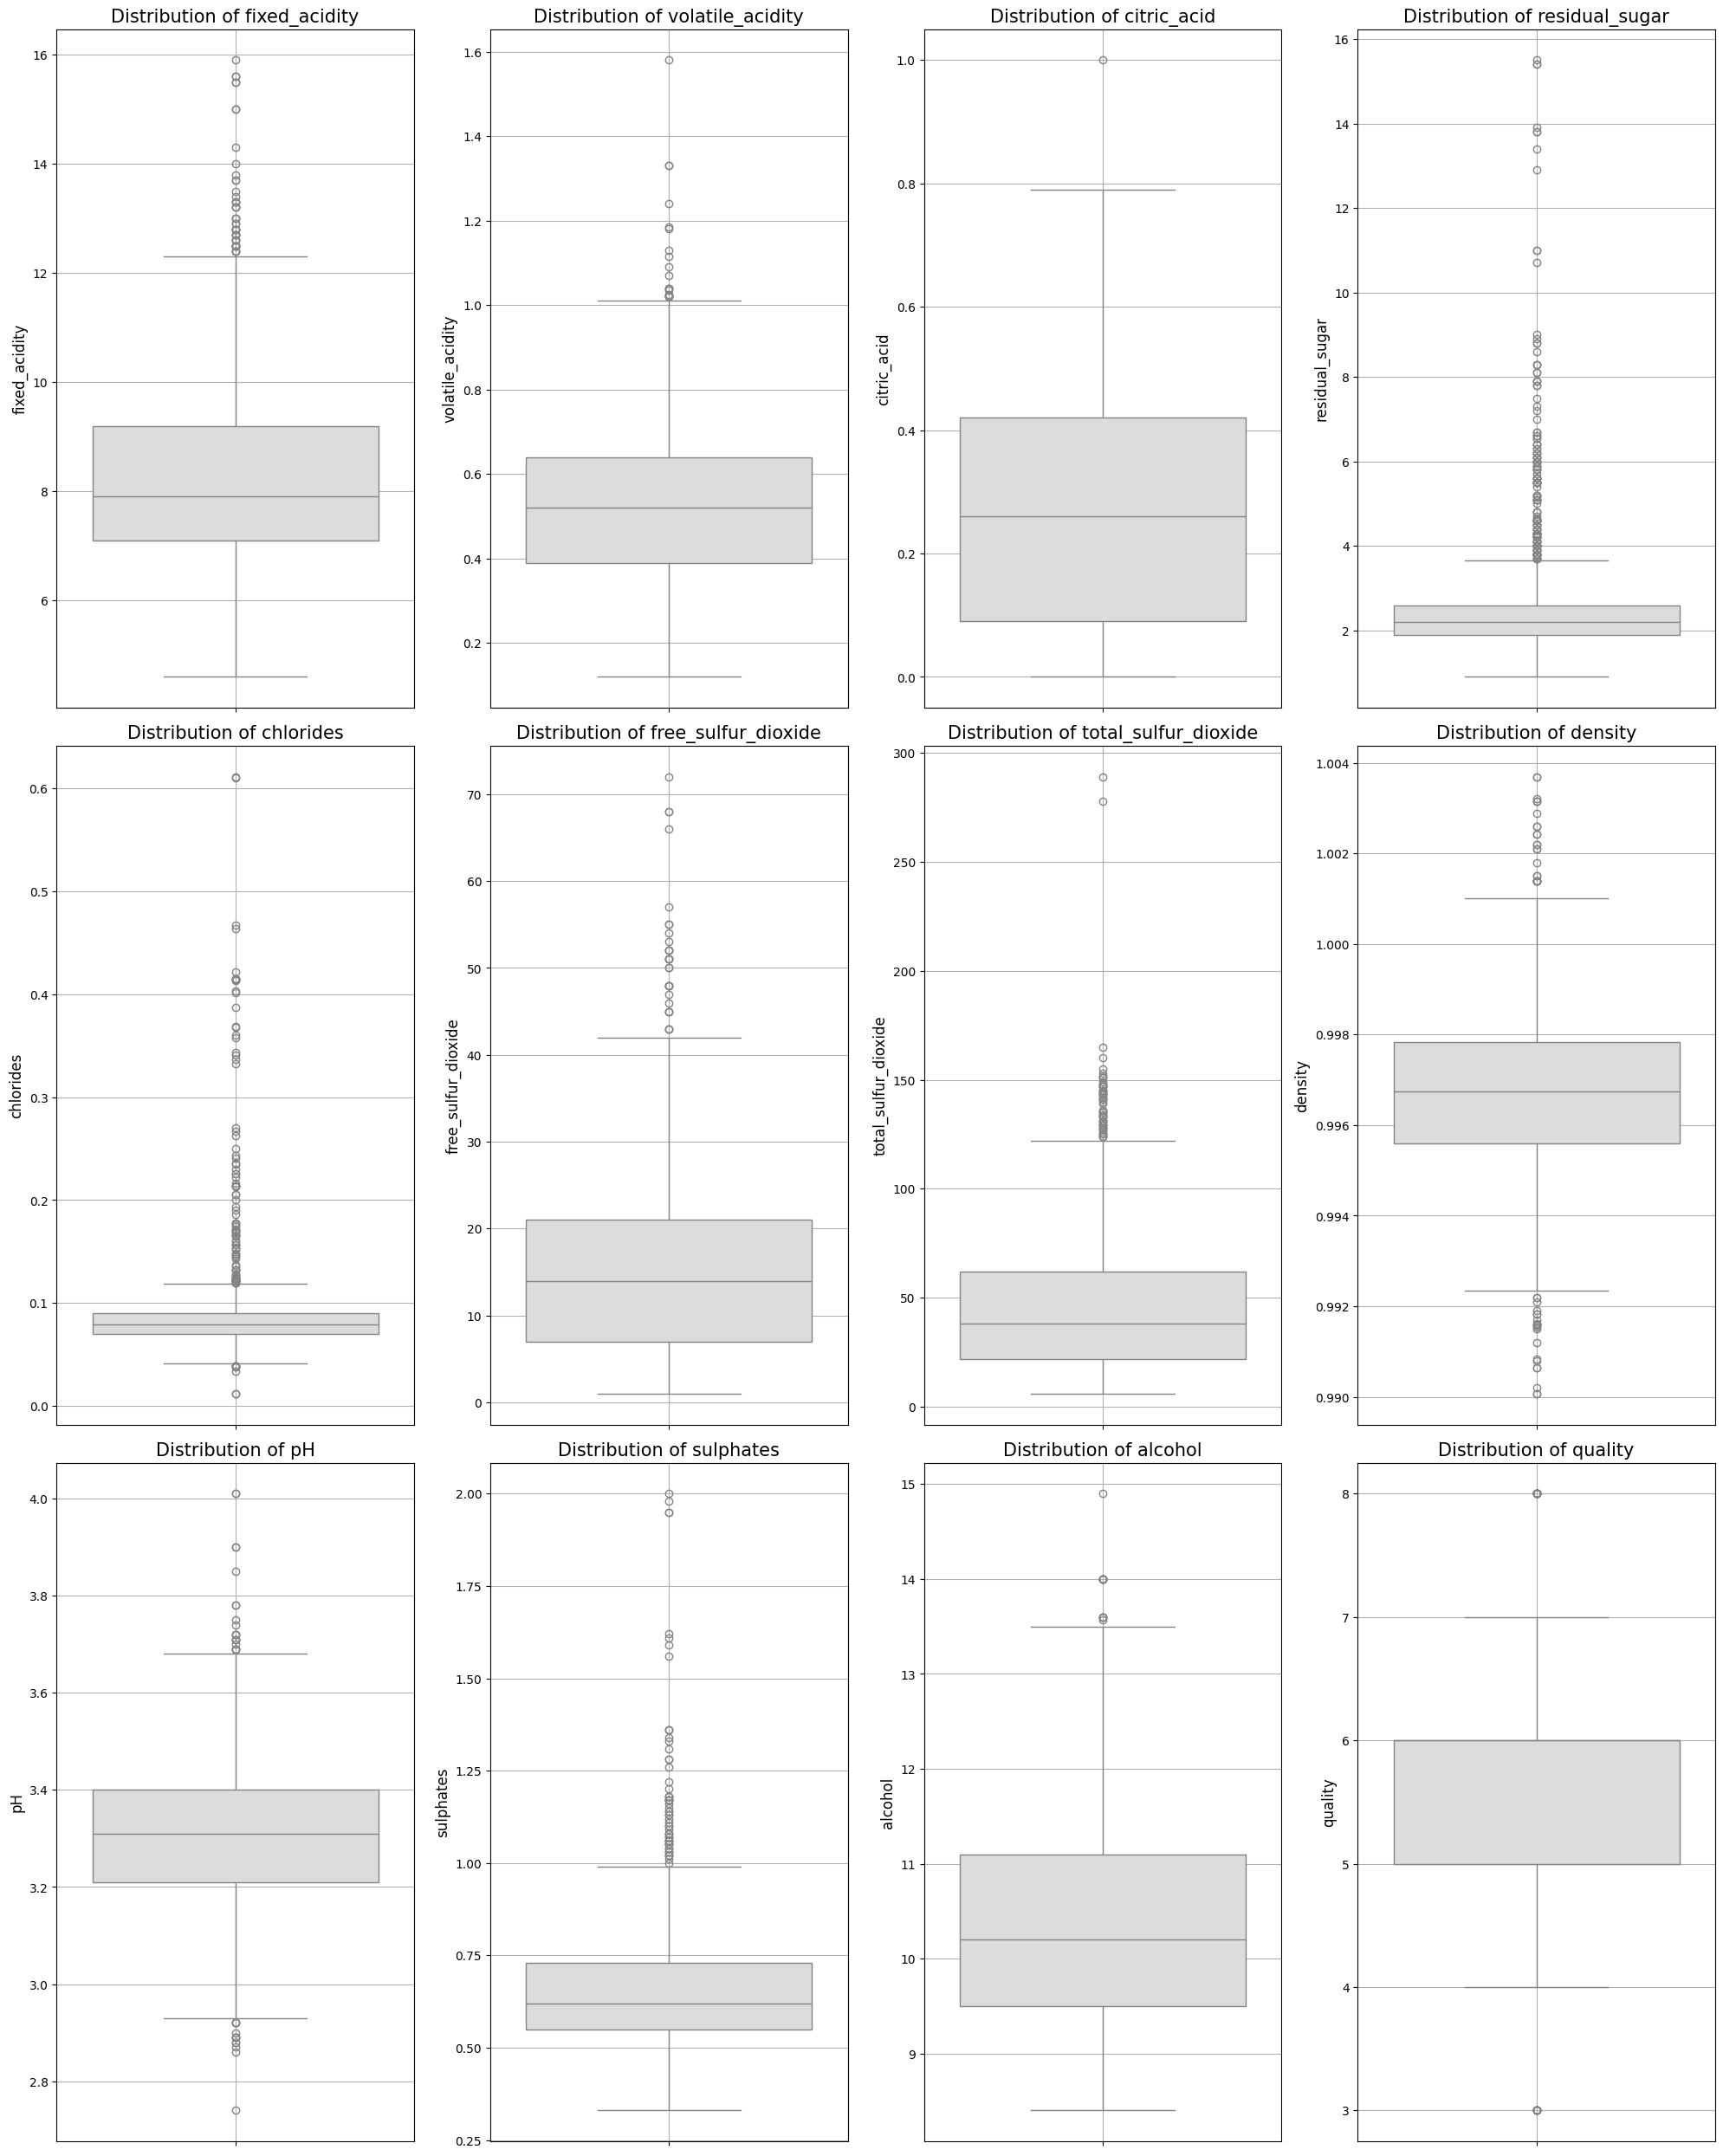

In [9]:
plt.figure(figsize=(20, 25))

plotnumber = 1

for column in df.columns:
    if plotnumber <= 12: 
        plt.subplot(3, 4, plotnumber)
        sns.boxplot(y=df[column], palette="coolwarm") 
        plt.title(f'Distribution of {column}', fontsize=15)  
        plt.ylabel(column, fontsize=12)  
        plt.grid(True)
    
    plotnumber += 1 

plt.tight_layout()
plt.show()


### Multivariable Pair Plot

The generated graph is a pair plot, which is a grid of scatter plots and histograms used for multivariate analysis. It shows the pairwise relationships between all numerical columns in the dataset, while color-coding the points based on the quality variable. Diagonal plots typically display the distribution of individual variables, while off-diagonal scatter plots illustrate the relationships between pairs of features, allowing for an examination of patterns, correlations, and clusters within the data, as well as how the quality variable interacts with these relationships.

In [ ]:
# Multivariate Analysis
plt.figure(figsize=(30, 15))
sns.pairplot(data=df, hue='quality')
plt.show()

### Descriptive Statistics for Key Features

The generated graph is a heatmap of the descriptive statistics for the dataset, displaying summary statistics such as the mean, standard deviation, minimum, maximum, and quartiles for each numerical column. The heatmap visualizes these statistics using color shading, which helps in quickly identifying patterns or outliers in the summary data. Annotating each cell with its respective value ensures that important details are not lost in the color scale, making it easy to interpret key statistical insights like central tendencies, spread, and distribution.

In [ ]:
plt.figure(figsize=(22, 7))

sns.heatmap(df.describe(), 
            annot=True, 
            linewidths=0.15, 
            linecolor="black", 
            fmt='.2f',        # Keeping two decimal places
            square=True)  # Make the cells square-shaped for a clean grid layout

plt.title("Descriptive Statistics of the Dataset", fontsize=12, fontweight='bold', pad=10)  # Title with padding
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(rotation=0,fontsize=10)  # Y-axis labels font enhancement

plt.show()
